In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white')

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
df = pd.read_csv('BankChurners.csv')

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# Drop Unneccessary Columns
df.drop(['CLIENTNUM',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
         axis=1, inplace=True)

In [4]:
# Look at first 5 rows of the dataframe
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
# How many rows and columns?
df.shape

(10127, 20)

In [6]:
# Information about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [7]:
# Statistics of Numerical Values
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


In [8]:
# Statistics of Categorical Variables
df.describe(include=('O'))

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


## Explore Numerical Continuous Features

In [9]:
# Dataframe of Continuous Features
df_num = df[['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
             'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
             'Avg_Utilization_Ratio']]

df_num.head()

,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,39,12691.0,777,11914.0,1144,1.335,42,1.625,0.061
1,49,44,8256.0,864,7392.0,1291,1.541,33,3.714,0.105
2,51,36,3418.0,0,3418.0,1887,2.594,20,2.333,0.000
3,40,34,3313.0,2517,796.0,1171,1.405,20,2.333,0.760
4,40,21,4716.0,0,4716.0,816,2.175,28,2.500,0.000


Column: Customer_Age


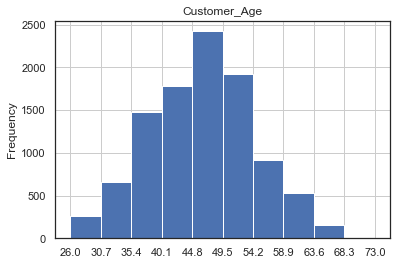

46.0



Column: Months_on_book


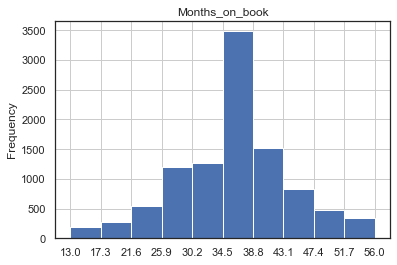

36.0



Column: Credit_Limit


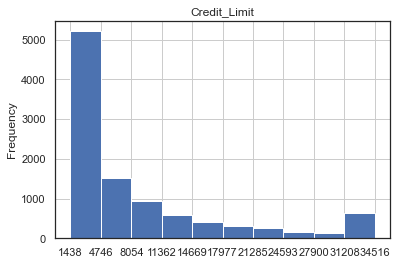

4549.0



Column: Total_Revolving_Bal


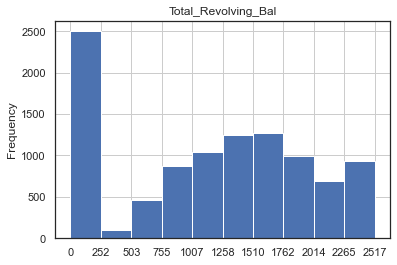

1276.0



Column: Avg_Open_To_Buy


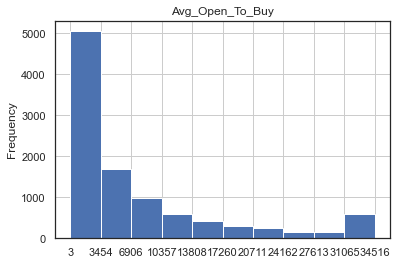

3474.0



Column: Total_Trans_Amt


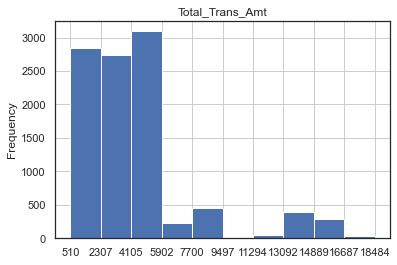

3899.0



Column: Total_Amt_Chng_Q4_Q1


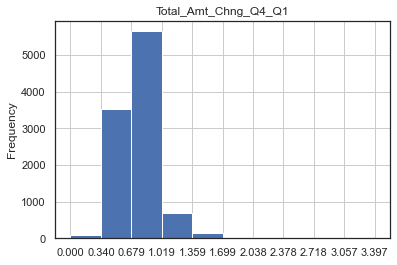

0.736



Column: Total_Trans_Ct


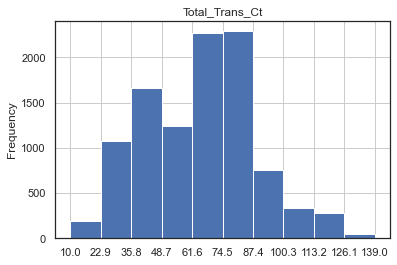

67.0



Column: Total_Ct_Chng_Q4_Q1


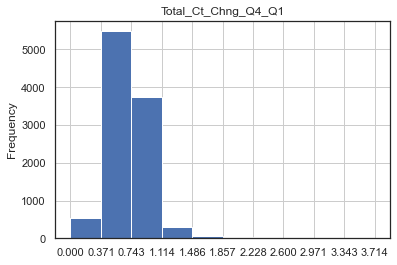

0.7020000000000001



Column: Avg_Utilization_Ratio


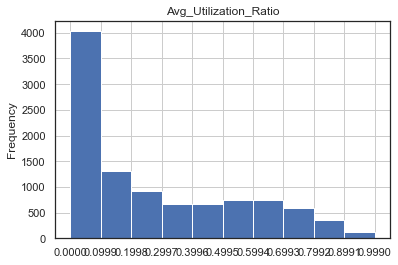

0.17600000000000002

In [10]:
# Plot continuous columns
for col in df_num.columns:
    
    print('Column:', col)
    
    count, bin_edges = np.histogram(df_num[col])
    
    plt.figure(figsize=(6,4))
    df_num[col].plot(kind='hist', xticks=bin_edges, grid=True)
    plt.title(col)
    plt.show();
    
    # display(df_num[col].value_counts())
    display(df_num[col].median())
    
    print('\n')

## Explore Categorical Features

In [11]:
df_cat = df[['Gender', 'Education_Level', 'Marital_Status', 'Dependent_count', 'Total_Relationship_Count',
             'Income_Category', 'Card_Category', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']]

df_cat.head()

,Gender,Education_Level,Marital_Status,Dependent_count,Total_Relationship_Count,Income_Category,Card_Category,Months_Inactive_12_mon,Contacts_Count_12_mon
0,M,High School,Married,3,5,$60K - $80K,Blue,1,3
1,F,Graduate,Single,5,6,Less than $40K,Blue,1,2
2,M,Graduate,Married,3,4,$80K - $120K,Blue,1,0
3,F,High School,Unknown,4,3,Less than $40K,Blue,4,1
4,M,Uneducated,Married,3,5,$60K - $80K,Blue,1,0


In [12]:
# A breakdown of each categorical column
for i in df_cat.columns:
    print(i)
    print(df_cat[i].nunique())
    print(df_cat[i].unique())
    print('---'*25)

Gender
2
['M' 'F']
---------------------------------------------------------------------------
Education_Level
7
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
---------------------------------------------------------------------------
Marital_Status
4
['Married' 'Single' 'Unknown' 'Divorced']
---------------------------------------------------------------------------
Dependent_count
6
[3 5 4 2 0 1]
---------------------------------------------------------------------------
Total_Relationship_Count
6
[5 6 4 3 2 1]
---------------------------------------------------------------------------
Income_Category
6
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
---------------------------------------------------------------------------
Card_Category
4
['Blue' 'Gold' 'Silver' 'Platinum']
---------------------------------------------------------------------------
Months_Inactive_12_mon
7
[1 4 2 3 6 0 5]
----------------

In [13]:
# Breakdown of each categorical column
for i in df_cat:
    print('Column:', i)
    display(df_cat[i].value_counts())
    display(pd.crosstab(index=df[i], columns=df['Attrition_Flag']))

Column: Gender


F    5358
M    4769
Name: Gender, dtype: int64

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,930,4428
M,697,4072


Column: Education_Level


Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,154,859
Doctorate,95,356
Graduate,487,2641
High School,306,1707
Post-Graduate,92,424
Uneducated,237,1250
Unknown,256,1263


Column: Marital_Status


Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Attrition_Flag,Attrited Customer,Existing Customer
Marital_Status,,
Divorced,121,627
Married,709,3978
Single,668,3275
Unknown,129,620


Column: Dependent_count


3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

Attrition_Flag,Attrited Customer,Existing Customer
Dependent_count,,
0,135,769
1,269,1569
2,417,2238
3,482,2250
4,260,1314
5,64,360


Column: Total_Relationship_Count


3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64

Attrition_Flag,Attrited Customer,Existing Customer
Total_Relationship_Count,,
1,233,677
2,346,897
3,400,1905
4,225,1687
5,227,1664
6,196,1670


Column: Income_Category


Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,126,601
$40K - $60K,271,1519
$60K - $80K,189,1213
$80K - $120K,242,1293
Less than $40K,612,2949
Unknown,187,925


Column: Card_Category


Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,1519,7917
Gold,21,95
Platinum,5,15
Silver,82,473


Column: Months_Inactive_12_mon


3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

Attrition_Flag,Attrited Customer,Existing Customer
Months_Inactive_12_mon,,
0,15,14
1,100,2133
2,505,2777
3,826,3020
4,130,305
5,32,146
6,19,105


Column: Contacts_Count_12_mon


3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

Attrition_Flag,Attrited Customer,Existing Customer
Contacts_Count_12_mon,,
0,7,392
1,108,1391
2,403,2824
3,681,2699
4,315,1077
5,59,117
6,54,0


Column: Gender


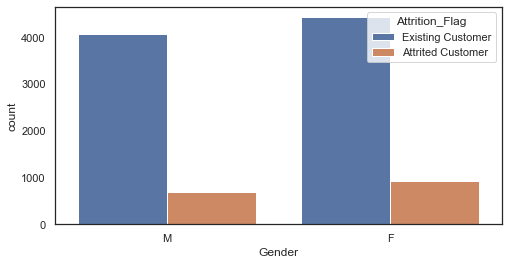

Column: Education_Level


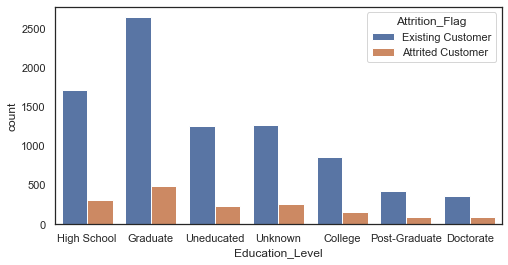

Column: Marital_Status


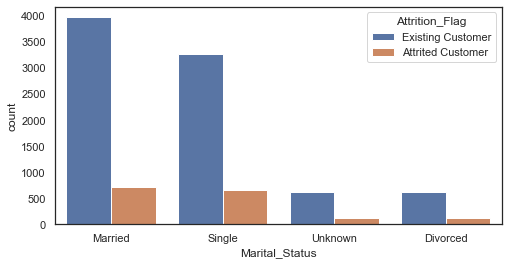

Column: Dependent_count


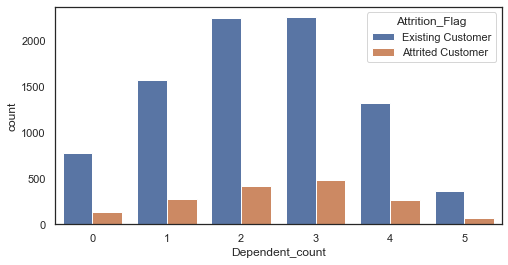

Column: Total_Relationship_Count


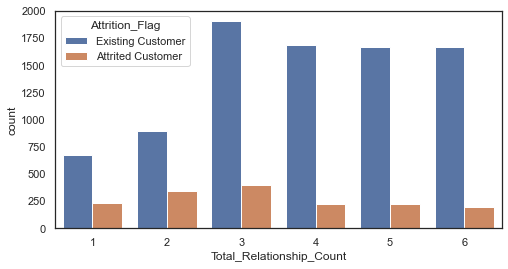

Column: Income_Category


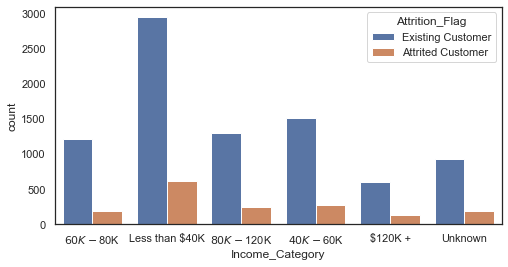

Column: Card_Category


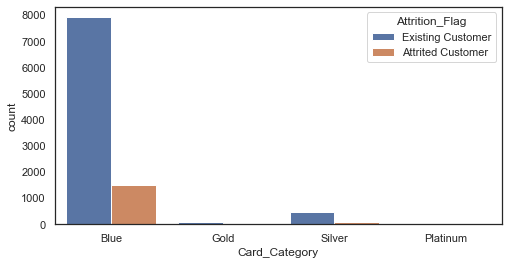

Column: Months_Inactive_12_mon


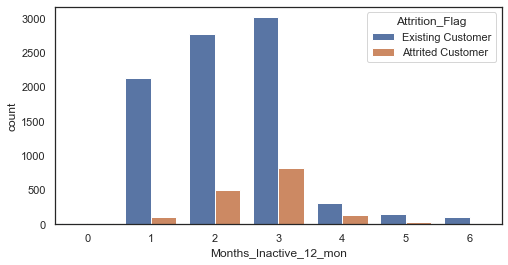

Column: Contacts_Count_12_mon


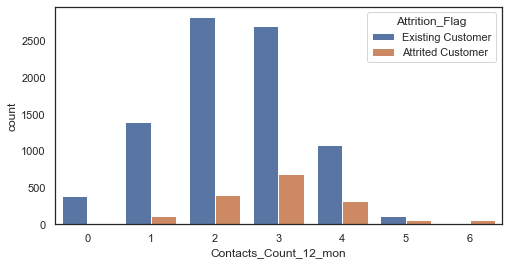

In [14]:
# Plot categorical features with target variable as the hue
for i in df_cat:
    
    print('Column:', i)
    
    plt.figure(figsize=(8,4))
    sns.countplot(x=df_cat[i], hue='Attrition_Flag', data=df)
    plt.show();

## Let's look at the correlation between the features

In [15]:
cat_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded = df[cat_features].apply(encoder.fit_transform)

database = df.drop(cat_features, axis=1)
database = database.drop(['Attrition_Flag'], axis=1)

database = pd.concat([encoded, database], axis=1)

database.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,3,1,2,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,2,2,4,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,2,1,3,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,3,3,4,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,5,1,2,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


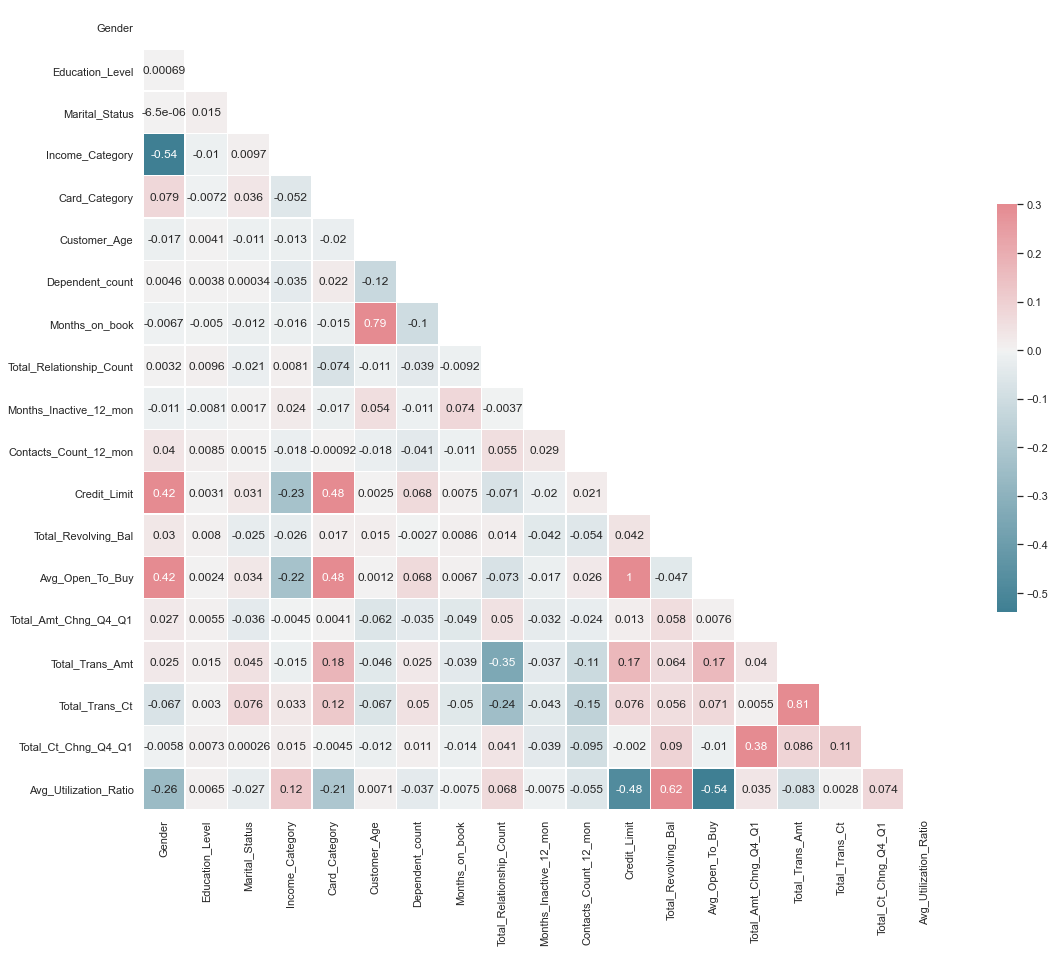

In [16]:
# Heat map
corr = database.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5,
            cbar_kws={'shrink':.5}, annot=True);

plt.show()

## Explore Target Column

In [17]:
# Count of each value in target colum
target = df['Attrition_Flag'].value_counts()

print(target)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


In [18]:
# Percentage of Churned customers
df['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

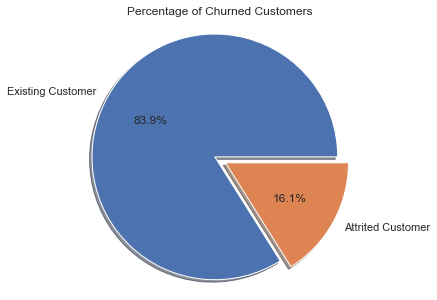

In [19]:
# Plot a pie chart
fig1, ax1 = plt.subplots(figsize=(5,5))

ax1.pie(target, labels=target.index, explode = (0.1,0), autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Percentage of Churned Customers')
plt.show()

#### We have imbalanced data because only 16.1% of all customers churn. Upsampling will likely be required to receive better results.

## Transform Some Continuous Numerical Features for Better Model Performance

In [20]:
# Check distribution skew
display(df['Credit_Limit'].skew())
display(df['Avg_Open_To_Buy'].skew())
display(df['Total_Trans_Amt'].skew())
display(df['Total_Amt_Chng_Q4_Q1'].skew())
display(df['Total_Ct_Chng_Q4_Q1'].skew())

1.666725807993647

1.6616965459311595

2.0410034025756936

1.7320634114286024

2.0640305679077477

In [21]:
# Perform Log Transformations
df['Credit_Limit_log'] = np.log((1 + df['Credit_Limit']))
df['Avg_Open_To_Buy_Log'] = np.log((1 + df['Avg_Open_To_Buy']))
df['Total_Trans_Amt_Log'] = np.log((1 + df['Total_Trans_Amt']))
df['Total_Amt_Chng_Q4_Q1_Log'] = np.log((1 + df['Total_Amt_Chng_Q4_Q1']))
df['Total_Ct_Chng_Q4_Q1_Log'] = np.log((1 + df['Total_Ct_Chng_Q4_Q1']))

In [22]:
# Skew after transformation
display(df['Credit_Limit_log'].skew())
display(df['Avg_Open_To_Buy_Log'].skew())
display(df['Total_Trans_Amt_Log'].skew())
display(df['Total_Amt_Chng_Q4_Q1_Log'].skew())
display(df['Total_Ct_Chng_Q4_Q1_Log'].skew())

0.4573030114679005

-0.09529846342015706

0.26277956391290064

0.6484403480125297

0.5101717316864729

In [23]:
# Drop old (non-transformed) columns
df.drop(['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1'], axis=1, inplace=True)

## Data Preparation for Modelling

In [24]:
# Encoding Categorical Variables
df_new = pd.get_dummies(df, columns=['Education_Level', 'Marital_Status', 
                                     'Income_Category', 'Card_Category'])

In [25]:
# Encoding Binary Columns
df_new.Attrition_Flag.replace(('Attrited Customer', 'Existing Customer'), (1, 0), inplace=True)
df_new.Gender.replace(('M', 'F'), (1, 0), inplace=True)

In [26]:
df_new.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Ct,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,1,3,39,5,1,3,777,42,...,0,0,1,0,0,0,1,0,0,0
1,0,49,0,5,44,6,1,2,864,33,...,0,0,0,0,1,0,1,0,0,0
2,0,51,1,3,36,4,1,0,0,20,...,0,0,0,1,0,0,1,0,0,0
3,0,40,0,4,34,3,4,1,2517,20,...,0,0,0,0,1,0,1,0,0,0
4,0,40,1,3,21,5,1,0,0,28,...,0,0,1,0,0,0,1,0,0,0


In [27]:
# Get a list of the columns from the encoded dataset
list(df_new.columns)

['Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Total_Trans_Ct',
 'Avg_Utilization_Ratio',
 'Credit_Limit_log',
 'Avg_Open_To_Buy_Log',
 'Total_Trans_Amt_Log',
 'Total_Amt_Chng_Q4_Q1_Log',
 'Total_Ct_Chng_Q4_Q1_Log',
 'Education_Level_College',
 'Education_Level_Doctorate',
 'Education_Level_Graduate',
 'Education_Level_High School',
 'Education_Level_Post-Graduate',
 'Education_Level_Uneducated',
 'Education_Level_Unknown',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Unknown',
 'Income_Category_$120K +',
 'Income_Category_$40K - $60K',
 'Income_Category_$60K - $80K',
 'Income_Category_$80K - $120K',
 'Income_Category_Less than $40K',
 'Income_Category_Unknown',
 'Card_Category_Blue',
 'Card_Category_Gold',
 'Card_Category_Platinum',
 'Card_Category_Silver']

#### Correlation of features to target variable

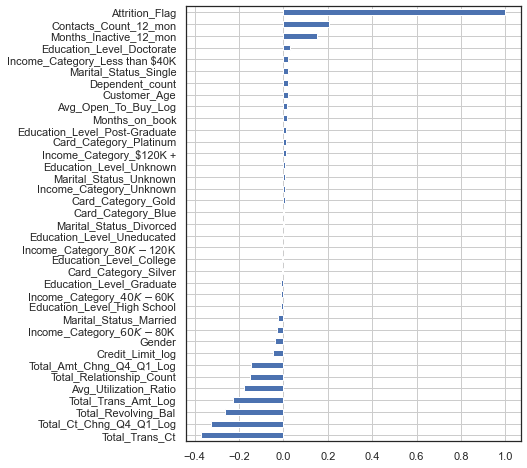

In [50]:
plt.figure(figsize=(6,8))
df_new.corr()['Attrition_Flag'].sort_values().plot(kind='barh', grid=True);
plt.show()

In [29]:
# Assign Independent and Dependent Variables
X = df_new.drop(['Attrition_Flag'], axis=1).values
y = df_new['Attrition_Flag'].values

In [30]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Feature Scale

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate
scaler = MinMaxScaler()

# Fit & Transform Train Set
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Train many Machine Learning Models on the Training set

In [32]:
# Create a function for many Machine Learning Models
def models(X_train, y_train):
  
  # Using the Logistic Regression Algorithm on the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, y_train)
  
  # Using the K-Nearest Neighbors Algorithm on the Training Set
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, y_train)

  # Using the SVM Algorithm on the Training Set
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, y_train)

  #Using the Kernel SVM Algorithm on the Training Set
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, y_train)

  # Using the Naive Bayes Algorithm on the Training Set
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, y_train)

  #Using the Decision Tree Classifier on the Training Set
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, y_train)

  # Using the Random Forest Classifier on the Training Set
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, y_train)
    
  # Using the XGBoost Classifier on the Training Set
  from xgboost import XGBClassifier
  xgb = XGBClassifier()
  xgb.fit(X_train, y_train)
  
  # Print model accuracy on the training data.
  print('[0] Logistic Regression Training Accuracy:', log.score(X_train, y_train))
  print('[1] K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
  print('[2] Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
  print('[3] Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
  print('[4] Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
  print('[5] Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
  print('[6] Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  print('[7] XGBoost Classifier Training Accuracy:', xgb.score(X_train, y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest, xgb

### Predicting the Test Set Results

In [33]:
model = models(X_train, y_train)

model

[12:32:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0] Logistic Regression Training Accuracy: 0.9137143562523146
[1] K Nearest Neighbor Training Accuracy: 0.892852734230342
[2] Support Vector Machine (Linear Classifier) Training Accuracy: 0.9170472781138131
[3] Support Vector Machine (RBF Classifier) Training Accuracy: 0.9219849401308481
[4] Gaussian Naive Bayes Training Accuracy: 0.8724848784100728
[5] Decision Tree Classifier Training Accuracy: 1.0
[6] Random Forest Classifier Training Accuracy: 0.9962967534872238
[7] XGBoost Classifier Training Accuracy: 1.0


(LogisticRegression(random_state=0),
 KNeighborsClassifier(),
 SVC(kernel='linear', random_state=0),
 SVC(random_state=0),
 GaussianNB(),
 DecisionTreeClassifier(criterion='entropy', random_state=0),
 RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None))

### Evaluating Our Models

In [34]:
from sklearn.metrics import confusion_matrix 

for i in range(len(model)):
   cm = confusion_matrix(y_test, model[i].predict(X_test)) 
   
   # Extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
   print(cm)
   
   print('Model[{}] Testing Accuracy = "{} "'.format(i,  (TP + TN) / (TP + TN + FN + FP)*100))
   print() # Print a new line

[[1661   34]
 [ 153  178]]
Model[0] Testing Accuracy = "90.76999012833168 "

[[1649   46]
 [ 235   96]]
Model[1] Testing Accuracy = "86.13030602171767 "

[[1656   39]
 [ 147  184]]
Model[2] Testing Accuracy = "90.81934846989141 "

[[1671   24]
 [ 173  158]]
Model[3] Testing Accuracy = "90.27640671273444 "

[[1571  124]
 [ 151  180]]
Model[4] Testing Accuracy = "86.426456071076 "

[[1642   53]
 [ 101  230]]
Model[5] Testing Accuracy = "92.39881539980257 "

[[1675   20]
 [ 116  215]]
Model[6] Testing Accuracy = "93.2872655478776 "

[[1666   29]
 [  82  249]]
Model[7] Testing Accuracy = "94.52122408687067 "



### XGBoost gave us the highest accuracy on the test set. Let's use SMOTE to oversample our imbalanced target class and retrain the model.

In [41]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(sampling_strategy='auto', random_state=0)

from xgboost import XGBClassifier
model = XGBClassifier()

# Define the pipeline and combine sampling method with the model
pipeline = Pipeline([('SMOTE', resampling), ('RF', model)])

In [42]:
# Fit the pipeline on the training set
pipeline.fit(X_train, y_train) 

# Predict values using the test set
predicted = pipeline.predict(X_test)

[12:45:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [44]:
# Getting the accuracy
from sklearn.metrics import classification_report
print('Classifcation report:\n', classification_report(y_test, predicted))

conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1695
           1       0.88      0.81      0.85       331

    accuracy                           0.95      2026
   macro avg       0.92      0.90      0.91      2026
weighted avg       0.95      0.95      0.95      2026

Confusion matrix:
 [[1660   35]
 [  62  269]]


## Model Remarks
- Our model correctly identified 269 customers who churned.
- It incorrectly identified 62 customers who the model thought would not churn but did actually churn. 
- Of the 331 people who did actually churn, our model was able to correcly identify 269 of them for an accuracy of 81%.

### Cross-Validation of the Final Model

In [45]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = pipeline, X = X_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[12:54:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### XGBoost performed exceptionally well on this dataset. With 10 cross-validations we get an average accuracy of 97.20% and a standard deviation of only 0.69%.